In [1]:
import pandas as pd
df = pd.read_csv("c:/data/iris/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,target,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [3]:
X=df[df.columns[:4]]
y=df['Species']


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=10)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.9666666666666667


In [8]:
#하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
# 하이퍼 파라미터 조합
params = {
'n_neighbors': list(range(1,11)),
'algorithm': ['ball_tree','kd_tree','brute'],
'weights': ['uniform','distance'],
'p': [1,2]
}
gcv = GridSearchCV(model, params, cv=3) # cv 교차검증횟수
gcv.fit(X, y)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [9]:
gcv.cv_results_["params"][:5]

[{'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}]

In [14]:
scores=gcv.cv_results_["mean_test_score"] # 평균점수
scores


array([0.96      , 0.96      , 0.96      , 0.96      , 0.92      ,
       0.96      , 0.94666667, 0.96      , 0.96666667, 0.96666667,
       0.97333333, 0.97333333, 0.96      , 0.96666667, 0.98666667,
       0.97333333, 0.96      , 0.96      , 0.98      , 0.97333333,
       0.95333333, 0.96      , 0.97333333, 0.98666667, 0.96666667,
       0.96      , 0.97333333, 0.98      , 0.96      , 0.96      ,
       0.96666667, 0.98666667, 0.96666667, 0.96      , 0.97333333,
       0.97333333, 0.96666667, 0.96666667, 0.96666667, 0.98666667,
       0.96      , 0.96      , 0.96      , 0.96      , 0.92      ,
       0.96      , 0.94666667, 0.96      , 0.96666667, 0.96666667,
       0.97333333, 0.97333333, 0.96      , 0.96666667, 0.98666667,
       0.97333333, 0.96      , 0.96      , 0.98      , 0.97333333,
       0.95333333, 0.96      , 0.97333333, 0.98666667, 0.96666667,
       0.96      , 0.97333333, 0.98      , 0.96      , 0.96      ,
       0.96666667, 0.98666667, 0.96666667, 0.96      , 0.97333

0.9866666666666667


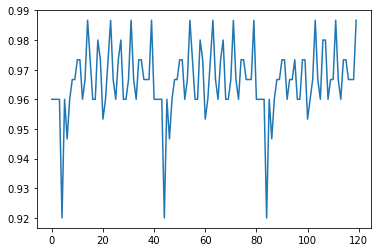

In [16]:
import matplotlib.pyplot as plt
print(max(scores))
plt.plot(scores)

In [12]:
#최고 정확도
print(gcv.best_score_)
#최적의 파라미터
print(gcv.best_params_)
#최적의 모형
print(gcv.best_estimator_)


0.9866666666666667
{'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4)


In [13]:
#최적의 파라미터를 적용한 모형
from sklearn.model_selection import cross_val_score
import numpy as np
model = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, p=2, weights='distance')
result=cross_val_score(model, X, y, cv=10) # 10회 교차검증
#교차검증 결과
print(result)
#교차검증 평균값
print(np.mean(result))

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668
